In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("BlackFridaySales.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(550068, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\2016751557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')


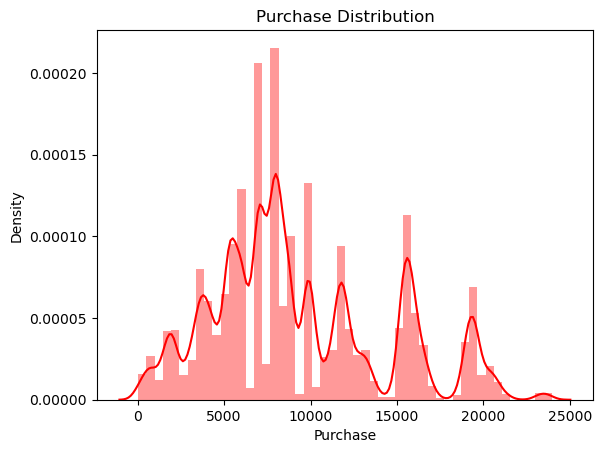

In [10]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

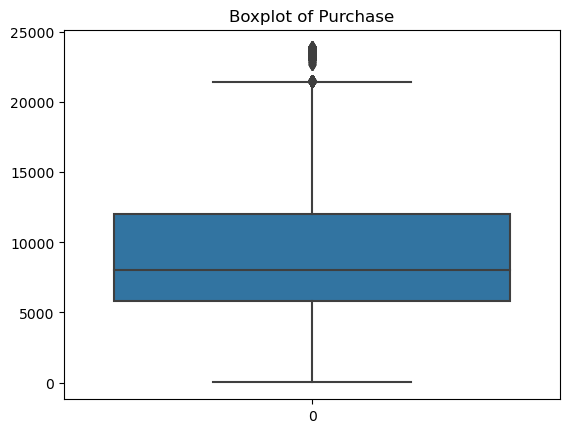

In [11]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [12]:
data["Purchase"].skew()

0.6001400037087128

In [13]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [14]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [17]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [18]:
data.groupby("Gender").mean()["Purchase"]

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\1885628993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").mean()["Purchase"]


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

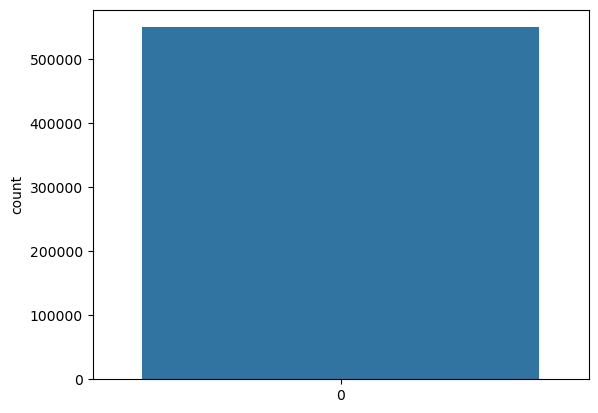

In [19]:
sns.countplot(data['Marital_Status'])
plt.show()

In [20]:
data.groupby("Marital_Status").mean()["Purchase"]

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\1889834230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\1515299697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')


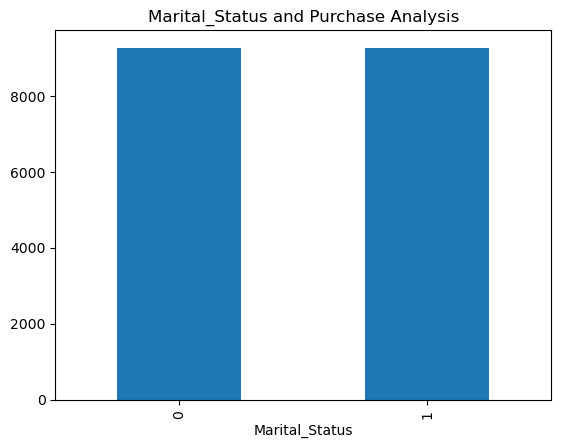

In [21]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

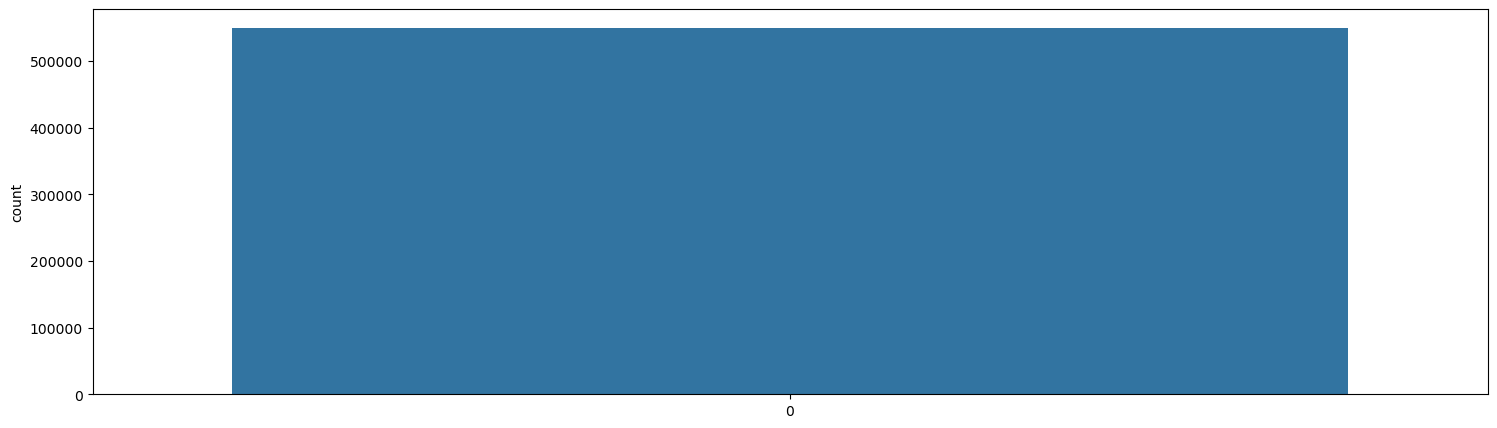

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

In [23]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\3307269300.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


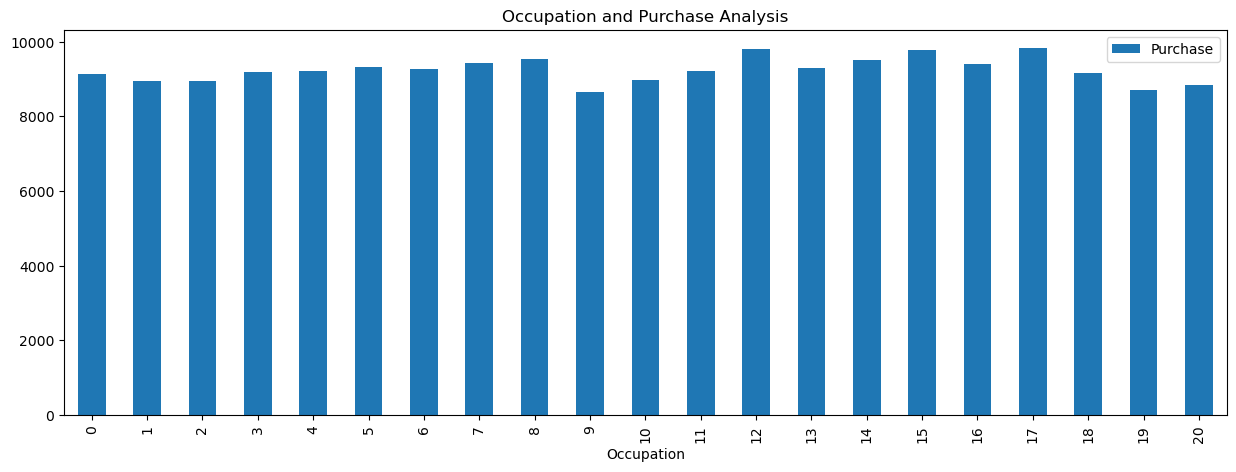

In [24]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\1068414020.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


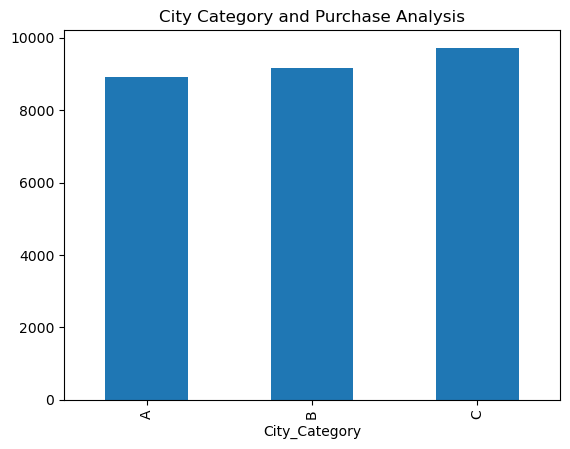

In [27]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\2109675666.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')


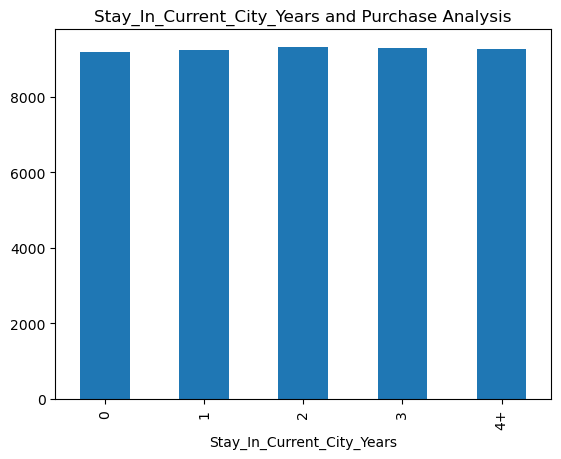

In [29]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

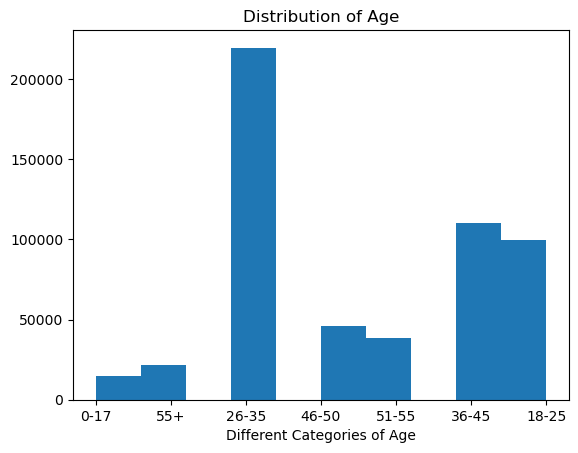

In [34]:
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\2783808705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").mean()["Purchase"].plot(kind='bar')


<Axes: xlabel='Age'>

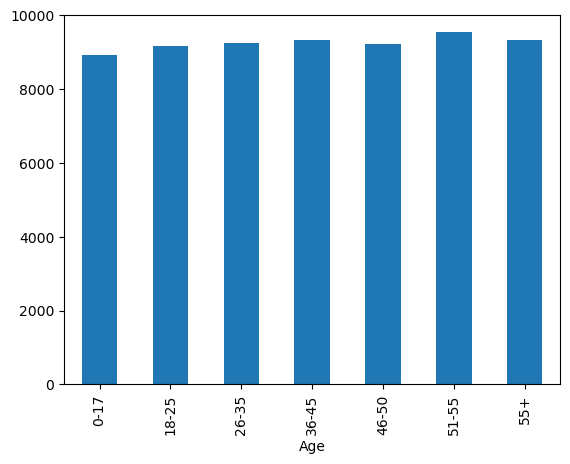

In [35]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\811742496.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").sum()['Purchase'].plot(kind="bar")


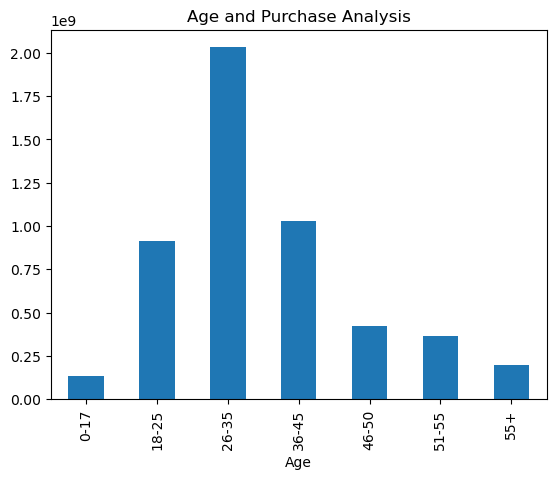

In [36]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

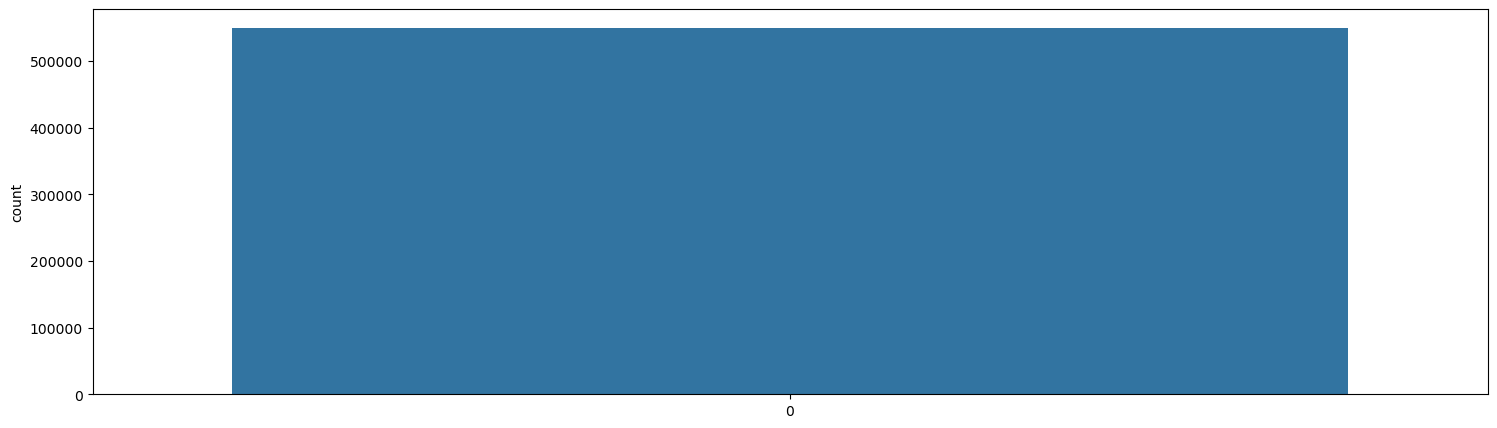

In [37]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\3827400744.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))


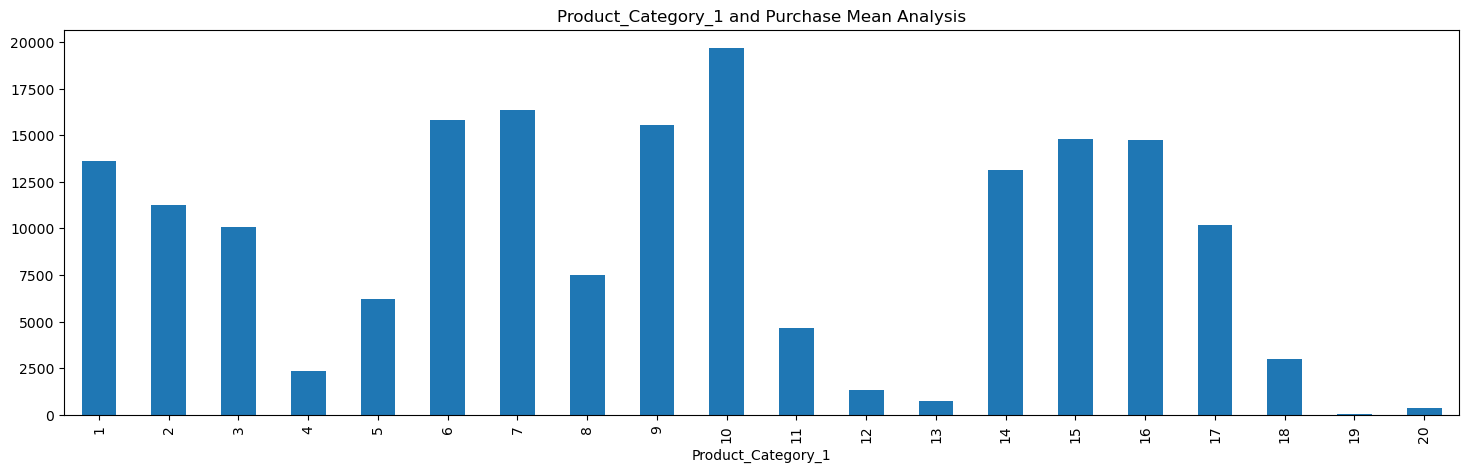

In [38]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\1216819276.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))


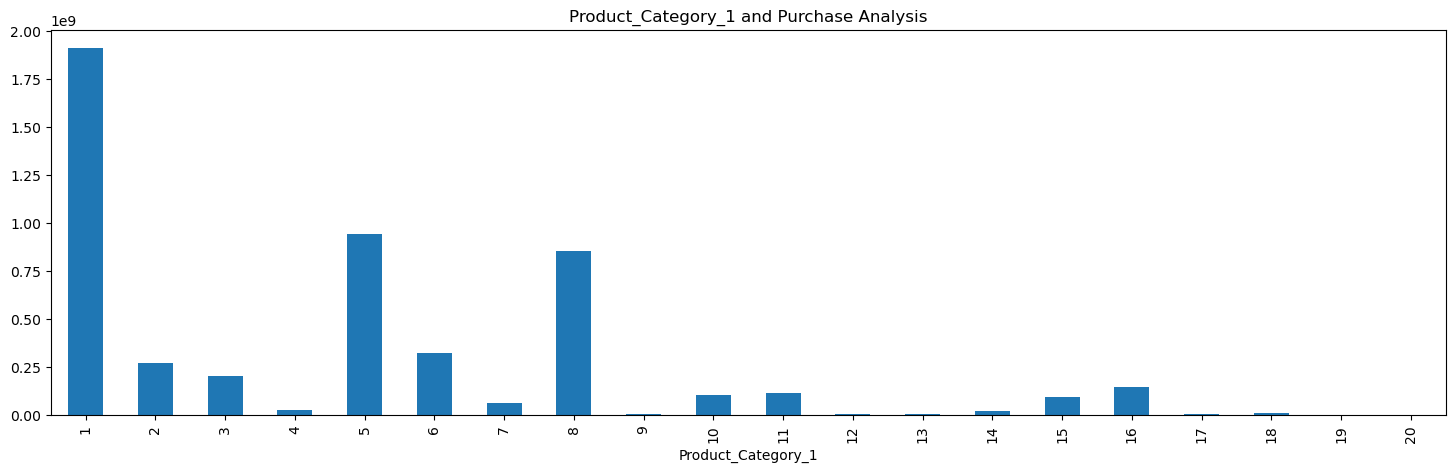

In [39]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

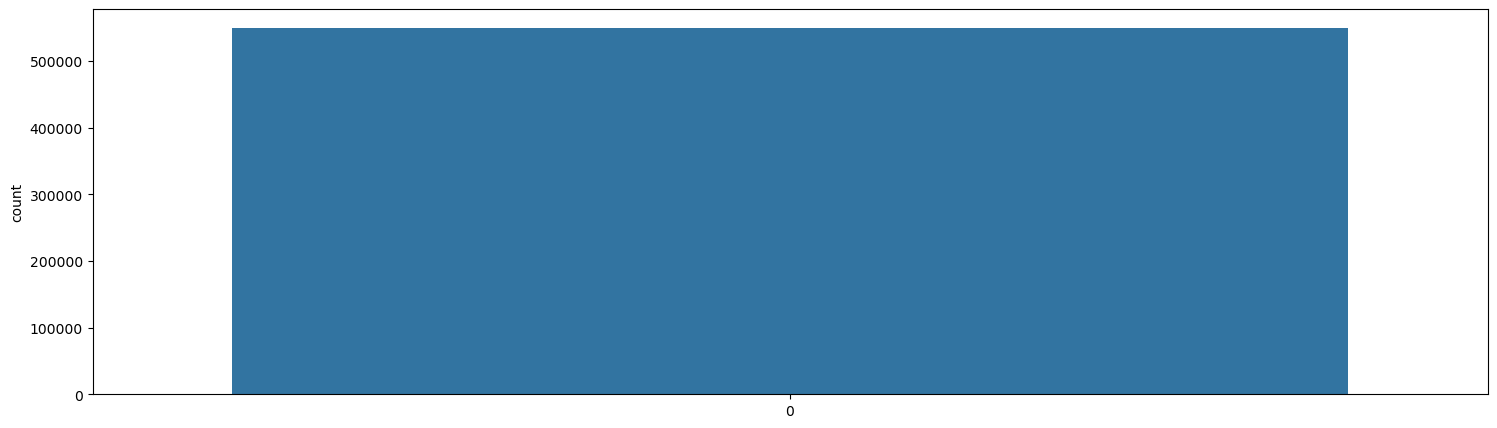

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

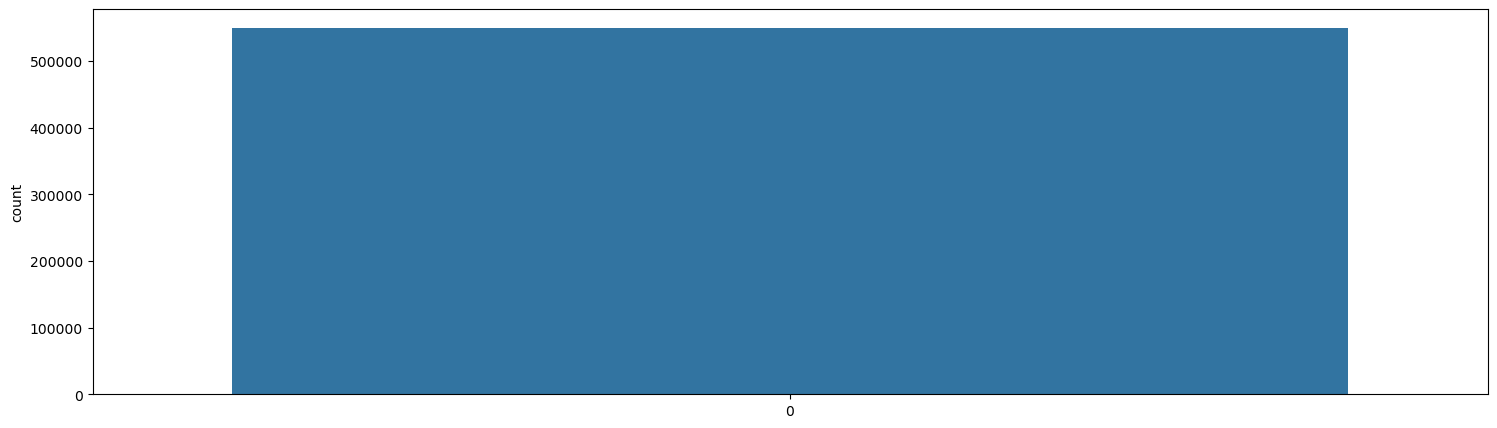

In [41]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [42]:
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_22360\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_22360\2246898758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


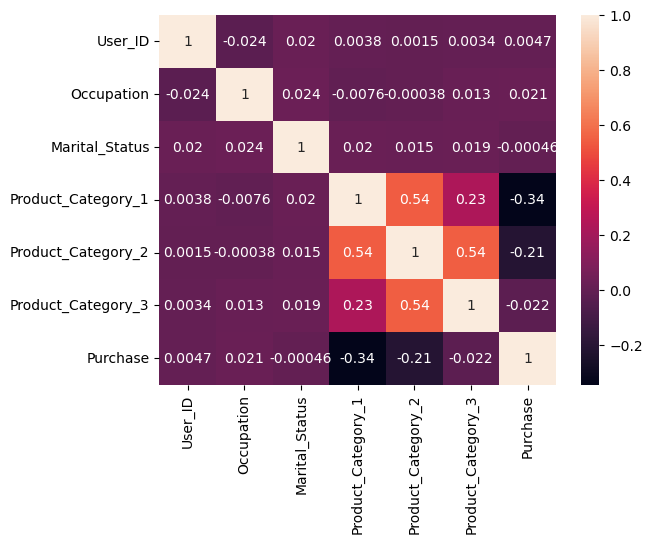

In [43]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [44]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [45]:
df = data.copy()

In [46]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [48]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [49]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [50]:
df['Age'] = lr.fit_transform(df['Age'])

In [51]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [52]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [53]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [54]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

In [56]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [57]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
lr.intercept_

9536.400764131602

In [62]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [63]:
y_pred = lr.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [65]:
mean_absolute_error(y_test, y_pred)

3532.069226165843

In [66]:
mean_squared_error(y_test, y_pred)

21397853.26940751

In [67]:
r2_score(y_test, y_pred)

0.15192944521481688

In [68]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


In [69]:
#decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

# create #Desiona regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [71]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
dt_y_pred = regressor.predict(X_test)

In [73]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [75]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [76]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [77]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


In [78]:
#random

In [79]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  

In [83]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [81]:
rf_y_pred = RFregressor.predict(X_test)

In [84]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [85]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [86]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [87]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


In [88]:
#xgboost

In [89]:
from xgboost.sklearn import XGBRegressor

In [90]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
xgb_y_pred = xgb_reg.predict(X_test)

In [92]:
mean_absolute_error(y_test, xgb_y_pred)

2141.713511241279

In [93]:
mean_squared_error(y_test, xgb_y_pred)

8241184.08588845

In [94]:
r2_score(y_test, xgb_y_pred)

0.6733734607696533

In [95]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2870.7462594051135
